In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [8]:
SEED = 42
np.random.seed(SEED)

In [9]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


In [10]:
dataset['cat_region'] = pd.Categorical(dataset['region'])
dataset['cat_region'] = dataset['cat_region'].cat.codes
dataset.sample(5)

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region
1005,lithuania,baltics,5.065825,10.085495,0.881811,64.500000,0.519352,-0.274880,0.962167,0.473150,0.272029,2010,1
1078,malta,western europe,6.154718,10.370396,0.922640,71.720001,0.881922,0.295860,0.652986,0.736184,0.339703,2011,10
67,australia,oceania,7.285391,10.702894,0.965276,71.720001,0.890682,0.347052,0.512578,0.826251,0.215351,2007,8
867,jordan,near east,5.171953,9.237214,0.840379,65.599998,0.692227,-0.116707,0.744979,0.684084,0.286033,2013,5
650,guatemala,latin amer. and carib,5.901429,8.849806,0.830442,60.740002,0.663382,0.172222,0.706096,0.818015,0.287082,2006,4


In [11]:
X = dataset.drop(['country', 'region', 'score'], axis=1)
y = dataset['score']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [12]:
LinearRegression().fit(x_train, y_train).score(x_test, y_test)

0.7614237962949602

In [13]:
ElasticNetCV(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.7424025041842205

In [14]:
BayesianRidge().fit(x_train, y_train).score(x_test, y_test)

0.7613085330427756

In [15]:
SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(x_train, y_train).score(x_test, y_test)

0.8223662918819352

In [22]:
KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train).score(x_test, y_test)

0.7661748967848726

In [24]:
RandomForestRegressor(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.8919773572365879

In [27]:
DecisionTreeRegressor(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.7947418675313962

In [28]:
dataset.corr()

,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region
score,1.000000,0.786760,0.710903,0.742423,0.524903,0.171968,-0.423622,0.526402,-0.305731,0.037531,0.059246
gdp,0.786760,1.000000,0.689782,0.834704,0.362880,-0.013398,-0.339782,0.299136,-0.224299,0.074857,-0.051085
social_support,0.710903,0.689782,1.000000,0.620191,0.412178,0.049919,-0.220744,0.429108,-0.403003,-0.006371,-0.008218
hle,0.742423,0.834704,0.620191,1.000000,0.388563,0.007027,-0.320664,0.309012,-0.147952,0.165953,-0.158477
freedom,0.524903,0.362880,0.412178,0.388563,1.000000,0.305791,-0.472828,0.602394,-0.267733,0.227725,0.060306
generosity,0.171968,-0.013398,0.049919,0.007027,0.305791,1.000000,-0.278279,0.334181,-0.077491,-0.036023,0.057679
corruption,-0.423622,-0.339782,-0.220744,-0.320664,-0.472828,-0.278279,1.000000,-0.285842,0.259155,-0.074125,-0.252090
positive_affect,0.526402,0.299136,0.429108,0.309012,0.602394,0.334181,-0.285842,1.000000,-0.372828,-0.001139,0.075334
negative_affect,-0.305731,-0.224299,-0.403003,-0.147952,-0.267733,-0.077491,0.259155,-0.372828,1.000000,0.209917,0.038011
year,0.037531,0.074857,-0.006371,0.165953,0.227725,-0.036023,-0.074125,-0.001139,0.209917,1.000000,0.038731


<AxesSubplot:xlabel='score', ylabel='gdp'>

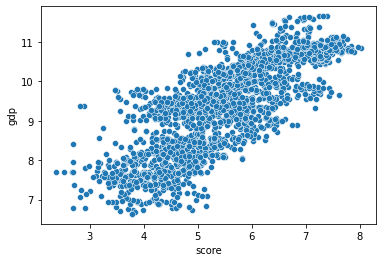

In [29]:
sns.scatterplot(x='score', y='gdp', data=dataset)

In [31]:
RandomForestRegressor(random_state=SEED).fit(X, y).score(X, y)

0.9851843990679581

In [32]:
until_2020 = dataset.query('year <= 2020')
X = until_2020.drop(['country', 'region', 'score'], axis=1)
y = until_2020['score']
since_2021 = dataset.query('year > 2020')
X_test = since_2021.drop(['country', 'region', 'score'], axis=1)
y_test = since_2021['score']

RandomForestRegressor(random_state=SEED).fit(X, y).score(X_test, y_test)

0.9578919366886532

In [48]:
predictions = RandomForestRegressor(random_state=SEED).fit(X, y).predict(X_test)
result = pd.DataFrame([predictions, X_test['gdp']]).T.rename(columns={0: 'score', 1: 'gdp'})
result

,score,gdp
0,7.596195,10.775202
1,7.602485,10.933176
2,7.528490,11.117368
3,7.516699,10.877768
4,7.360250,10.931812
...,...,...
144,3.701441,7.925777
145,3.768251,9.781536
146,3.827935,7.676118
147,3.692894,7.942595


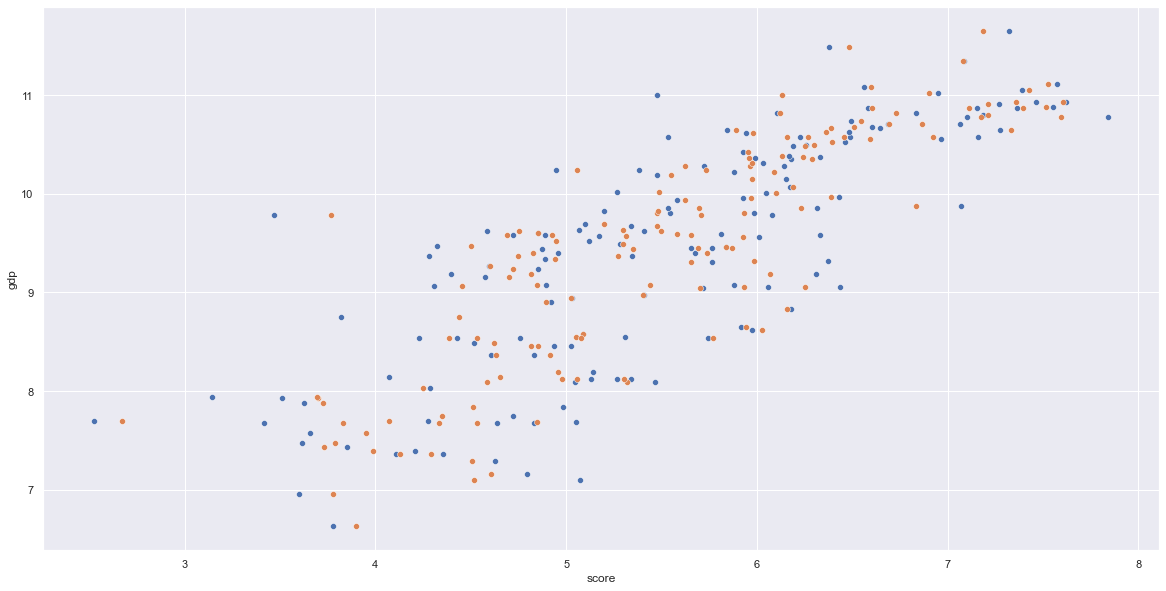

In [47]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='score', y='gdp', data=since_2021)
sns.scatterplot(x='score', y='gdp', data=result)
plt.show()